<a href="https://colab.research.google.com/github/jemaaku96/deeplearning/blob/main/Colored_Images_Classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn import metrics

In [2]:
cifar10 = tf.keras.datasets.cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
y_train, y_test = y_train.flatten(), y_test.flatten()
x_train.shape
y_train.shape

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


(50000,)

In [3]:
# number of classes
K = len(set(y_train))
K

10

In [6]:
i = Input(shape = x_train[0].shape)
x = Conv2D(32, (3, 3), strides = 2,activation = "relu")(i)
x = Conv2D(64, (3, 3), strides = 2, activation = "relu")(x)
x = Conv2D(128, (3, 3), strides = 2, activation = "relu")(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(1024, activation = "relu")(x)
x = Dropout(0.2)(x)
x = Dense(K, activation = "softmax")(x)

model = Model(i, x)

In [8]:
# Compile
model.compile(optimizer = "adam",
              loss = "sparse_categorical_crossentropy",
              metrics = ["accuracy"])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 15)

Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 71s 44ms/step - accuracy: 0.3783 - loss: 1.7049 - val_accuracy: 0.5522 - val_loss: 1.2666
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 81s 44ms/step - accuracy: 0.5743 - loss: 1.1910 - val_accuracy: 0.6227 - val_loss: 1.0455
Epoch 3/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 78s 41ms/step - accuracy: 0.6461 - loss: 0.9999 - val_accuracy: 0.6628 - val_loss: 0.9599
Epoch 4/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 42ms/step - accuracy: 0.6965 - loss: 0.8559 - val_accuracy: 0.6792 - val_loss: 0.9131
Epoch 5/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 85s 44ms/step - accuracy: 0.7395 - loss: 0.7398 - val_accuracy: 0.6960 - val_loss: 0.8616
Epoch 6/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.7685 - loss: 0.6522 - val_accuracy: 0.7042 - val_loss: 0.8532
Epoch 7/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 57s 37ms/step - accuracy: 0.8046 - loss: 0.5522 - val_accuracy: 0.7115 - val_loss: 0.8580
Epoch 8/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 83s 37ms/step - accuracy: 0.8272 -

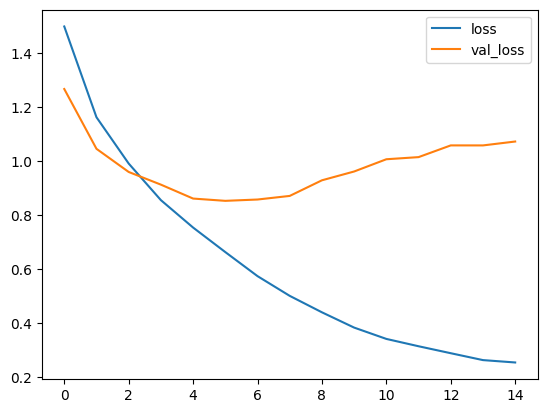

In [9]:
plt.plot(r.history["loss"], label = "loss")
plt.plot(r.history["val_loss"], label = "val_loss")
plt.legend();

# There's some chance the model is overfitting

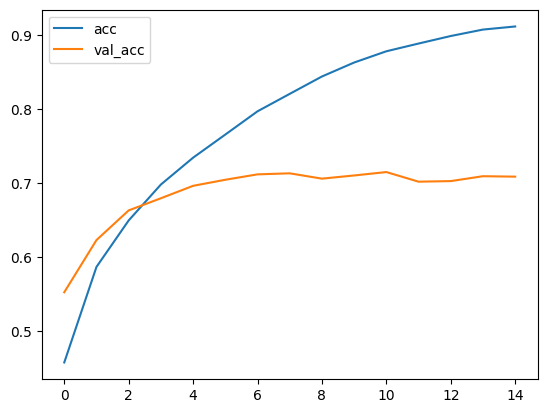

In [10]:
plt.plot(r.history["accuracy"], label = "acc")
plt.plot(r.history["val_accuracy"], label = "val_acc")
plt.legend();

# The val_accuracy is steady, another sign of overfitting.
# If training accuracy getting higher without improvement in the validation accuracy then the model is only learning to match the noise in the training set

In [11]:
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis = 1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


In [14]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.72      0.80      0.76      1000
           1       0.83      0.79      0.81      1000
           2       0.63      0.60      0.61      1000
           3       0.55      0.50      0.52      1000
           4       0.71      0.61      0.66      1000
           5       0.57      0.64      0.60      1000
           6       0.72      0.82      0.76      1000
           7       0.77      0.76      0.77      1000
           8       0.85      0.80      0.82      1000
           9       0.76      0.77      0.77      1000

    accuracy                           0.71     10000
   macro avg       0.71      0.71      0.71     10000
weighted avg       0.71      0.71      0.71     10000



Confusion matrix:
[[797  11  39  11  15  13  16  14  48  36]
 [ 26 785   9   8   2   6  22   3  23 116]
 [ 77   7 597  52  64  74  73  32   8  16]
 [ 20   7  69 503  39 199  85  39  15  24]
 [ 22   3  98  75 606  53  57  72   8   6]
 [ 13   6  52 163  34 640  39  38   7   8]
 [  5   7  37  49  36  31 816   8   8   3]
 [ 20   4  34  31  42  74  11 762   3  19]
 [ 78  36  11  11   9  14   6  10 804  21]
 [ 52  76   7  18   2  16  16  12  27 774]]


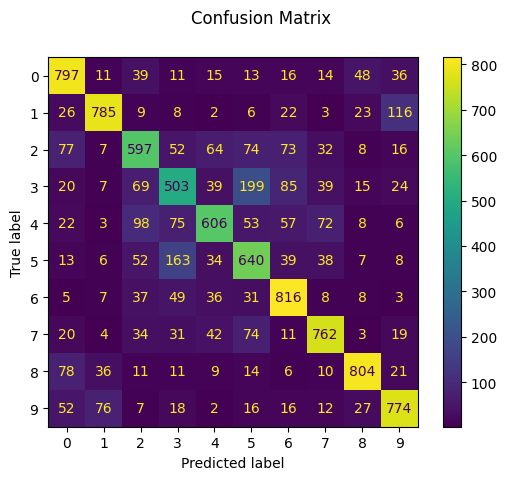

In [15]:
disp = metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
disp.figure_.suptitle("Confusion Matrix")
print(f"Confusion matrix:\n{disp.confusion_matrix}")

plt.show()

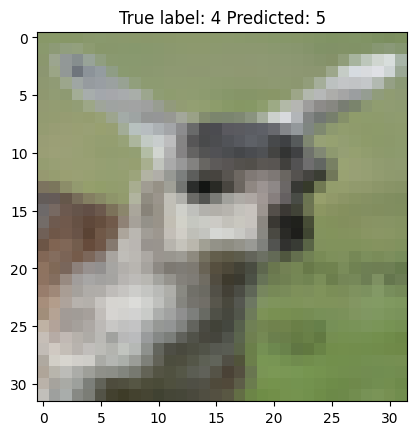

In [18]:
# Show some misclassified examples
misclassified_idx = np.where(y_pred != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap = 'gray')
plt.title(f"True label: {y_test[i]} Predicted: {y_pred[i]}");